In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
df = pd.read_csv(r'spotify_merged_dataset.csv')
df

,Unnamed: 0,session_id,session_length,skip_2,track_id,acousticness,danceability,loudness,speechiness,liveness
0,0,1_00001238-3f7a-4fd2-b52e-af4237a41ed9,20,True,t_91eb6576-0f1f-4394-92d8-560d7b8f632b,0.085350,0.790459,-4.660,0.052383,0.112247
1,1,1_00001238-3f7a-4fd2-b52e-af4237a41ed9,20,True,-999,-999.000000,-999.000000,-999.000,-999.000000,-999.000000
2,2,1_00001238-3f7a-4fd2-b52e-af4237a41ed9,20,True,t_98e73634-8f33-4275-b544-3451553f431e,0.133331,0.607389,-9.090,0.358223,0.122876
3,3,1_00001238-3f7a-4fd2-b52e-af4237a41ed9,20,False,-999,-999.000000,-999.000000,-999.000,-999.000000,-999.000000
4,4,1_00001238-3f7a-4fd2-b52e-af4237a41ed9,20,False,-999,-999.000000,-999.000000,-999.000,-999.000000,-999.000000
...,...,...,...,...,...,...,...,...,...,...
3392310,3392310,1_ffff59d0-50f1-4d4a-964a-7d1ade2382ad,20,True,-999,-999.000000,-999.000000,-999.000,-999.000000,-999.000000
3392311,3392311,1_ffff59d0-50f1-4d4a-964a-7d1ade2382ad,20,True,t_7ff847fa-c108-48c6-ae45-8bd6bdcf7421,0.312645,0.728095,-7.457,0.153034,0.127068
3392312,3392312,1_ffff59d0-50f1-4d4a-964a-7d1ade2382ad,20,True,t_af8803e8-4a4f-406e-b785-84f8a0b0e3e8,0.225016,0.651675,-6.516,0.301311,0.455351
3392313,3392313,1_ffff59d0-50f1-4d4a-964a-7d1ade2382ad,20,False,t_58614ebe-b63a-4b57-a7ad-48c33891b012,0.398734,0.532237,-6.386,0.056941,0.559030


In [5]:
def importDataSet():
  
  # importing the merged dataset from spotify
  spotifyData = pd.read_csv("spotify_merged_dataset.csv")
  tempDf = spotifyData

  # converting boolean output column to int 
  tempDf["skip_2"] = tempDf["skip_2"]*1
  
  y = tempDf["skip_2"].to_numpy()
  # print(tempDf.info())
  # Dropping output column and serial number column
  tempDf = tempDf.drop(tempDf.columns[[0, 1,3,4]], axis=1)
  # print(tempDf.info())

  x = tempDf.to_numpy()
  print(y)
  return spotifyData,x,y

In [6]:
# Test train Split
from tensorflow.keras.utils import to_categorical
spotifyData,X,Y = importDataSet()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)
X_train,X_test = X_train / 255.0, X_test / 255.0

[1 1 1 ... 1 0 1]


In [7]:
X_train

array([[ 7.84313725e-02, -3.91764706e+00, -3.91764706e+00,
        -3.91764706e+00, -3.91764706e+00, -3.91764706e+00],
       [ 6.27450980e-02,  3.44098097e-07,  1.59458144e-03,
        -9.60392110e-03,  1.32200893e-03,  3.49764263e-04],
       [ 7.84313725e-02,  9.71578208e-04,  3.77868274e-03,
        -2.90313721e-02,  4.48167850e-04,  4.47289207e-04],
       ...,
       [ 3.92156863e-02,  3.22263591e-03,  2.90928401e-03,
        -2.72078439e-02,  1.66866966e-03,  2.12148621e-04],
       [ 7.84313725e-02,  2.41309919e-03,  1.69014989e-03,
        -1.67294110e-02,  1.81936984e-04,  5.83459525e-04],
       [ 7.84313725e-02, -3.91764706e+00, -3.91764706e+00,
        -3.91764706e+00, -3.91764706e+00, -3.91764706e+00]])

In [8]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape,

((2272851, 6), (2272851, 2), (1119464, 6), (1119464, 2))

In [42]:
from keras.layers import Bidirectional, CuDNNLSTM , LSTM ,Dense
from tensorflow.keras.models import Sequential
model =Sequential()
# tf.keras.layers.CuDNNLSTM
model.add(LSTM(units=128, input_shape = (6,1)))
model.add(Dense(28, activation="relu")) 
model.add(Dense(8, activation="relu")) 
model.add(Dense(2,activation='sigmoid'))

In [43]:
loss = keras.losses.CategoricalCrossentropy(from_logits='true')
optim = keras.optimizers.Adamax(lr=0.001)
metrics = ["accuracy"]

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adamax.py:90: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adamax, self).__init__(name, **kwargs)


In [44]:
model.compile(loss=loss,optimizer=optim , metrics='accuracy')
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 128)               66560     
                                                                 
 dense_9 (Dense)             (None, 28)                3612      
                                                                 
 dense_10 (Dense)            (None, 8)                 232       
                                                                 
 dense_11 (Dense)            (None, 2)                 18        
                                                                 
Total params: 70,422
Trainable params: 70,422
Non-trainable params: 0
_________________________________________________________________


In [45]:
y_train.shape

(2272851, 2)

In [46]:
history=model.fit(X_train,y_train,batch_size=128,epochs=5,validation_data=(X_test,y_test),verbose=2)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


17757/17757 - 300s - loss: 0.6932 - accuracy: 0.5014 - val_loss: 0.6932 - val_accuracy: 0.5008 - 300s/epoch - 17ms/step
Epoch 2/5
17757/17757 - 296s - loss: 0.6932 - accuracy: 0.5011 - val_loss: 0.6932 - val_accuracy: 0.4992 - 296s/epoch - 17ms/step
Epoch 3/5
17757/17757 - 296s - loss: 0.6932 - accuracy: 0.5016 - val_loss: 0.6932 - val_accuracy: 0.5008 - 296s/epoch - 17ms/step
Epoch 4/5
17757/17757 - 293s - loss: 0.6932 - accuracy: 0.5015 - val_loss: 0.6931 - val_accuracy: 0.5008 - 293s/epoch - 17ms/step
Epoch 5/5
17757/17757 - 294s - loss: 0.6932 - accuracy: 0.5016 - val_loss: 0.6931 - val_accuracy: 0.5008 - 294s/epoch - 17ms/step


In [47]:
pip install plot_keras_history

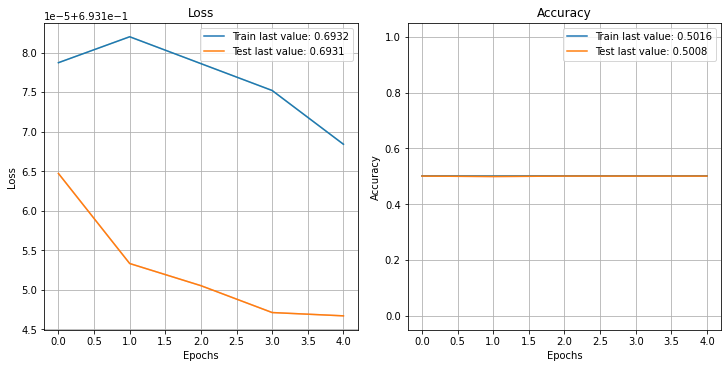

In [48]:
from plot_keras_history import show_history, plot_history
import matplotlib.pyplot as plt
show_history(history)
plot_history(history, path="standard.png")
plt.close()

In [17]:
import numpy as np
# Getting the predicted values based on the model data
# pred = model.predict_classes(X_test)
# df1= pd.DataFrame(pred, columns = ['skip'])
pred=model.predict(X_test) 
classes_x=np.argmax(pred,axis=1)
df1= pd.DataFrame(classes_x, columns = ['skip'])
print(classes_x)

# Appending the predicted values to the test set. The skip prediction can be used to classify the mood
spotifyData_x_train, spotifyData_x_test, spotifyData_y_train, spotifyData_y_test = train_test_split(spotifyData, Y, test_size=0.33, random_state=42)

# Merging the train and predicted values
headers = list(spotifyData.columns.values)
df2 = pd.DataFrame(spotifyData_x_test, columns = headers)
df2 = pd.concat([df1, df2], axis=1)
df2.describe()

[1 1 1 ... 1 1 1]


,skip,Unnamed: 0,session_length,skip_2,acousticness,danceability,loudness,speechiness,liveness
count,1.119464e+06,1.119464e+06,1.119464e+06,1.119464e+06,1.119464e+06,1.119464e+06,1.119464e+06,1.119464e+06,1.119464e+06
mean,5.114778e-01,1.696802e+06,1.755901e+01,5.007736e-01,-5.108590e+02,-5.106433e+02,-5.143923e+02,-5.108980e+02,-5.108730e+02
std,4.998685e-01,9.793407e+05,3.439249e+00,4.999996e-01,4.994784e+02,4.996991e+02,4.958683e+02,4.994385e+02,4.994641e+02
min,0.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02
25%,0.000000e+00,8.487492e+05,1.500000e+01,0.000000e+00,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02
50%,1.000000e+00,1.696538e+06,2.000000e+01,1.000000e+00,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02
75%,1.000000e+00,2.545291e+06,2.000000e+01,1.000000e+00,1.086623e-01,6.731898e-01,-6.477000e+00,8.070627e-02,1.247005e-01
max,1.000000e+00,3.392314e+06,2.000000e+01,1.000000e+00,9.957964e-01,9.950199e-01,4.532000e+00,9.705799e-01,1.000000e+00


In [18]:
def moodClassification(acousticness,danceability,loudness,speechiness,liveness):
  # ser = pd.Series(acousticness, dtype='int32')
  if (acousticness > 0.7 and speechiness < 0.5):
    # 0 for chill mood
    return 0
  elif (danceability > 0.6 ):
    # 1 for energetic 
    return 1
  elif (danceability > 0.5 or loudness>0.4 ):
    # 2 for romantic 
    return 2
  elif (danceability > 0.4 and  (loudness>0.4 or speechiness> .15)):
    # 3 for cheeerful 
    return 3
  else:
    return 4

def printMood(mood, sessionId):
  moodString = ""
  if (mood == 0 ):
    # 0 for chill mood
    moodString = 'chill'
  elif (mood == 1  ):
    moodString = 'energetic'
  elif (mood == 2 ):
    # 2 for romantic 
    moodString = 'romantic'
  elif (mood == 3 ):
    # 3 for cheeerful 
    moodString = 'cheeerful'
  print("Mood for the Session Id : ",sessionId, " is ", moodString)

In [ ]:
groupby_sessionId = df2.groupby('session_id',as_index=False)

# Iterating over the grouped sessions
for sessionId, frame in groupby_sessionId:
    
    # Dropping the columns with irrelavent data like trackid, session length
    frame = frame.drop(frame.columns[[ 1,2,3,4,5]], axis=1)
    
    # Selecting the songs that are not skipped to predict mood
    frame[frame < 0] = 0
    
    # Classifying the mood based on accoustic features
    frame['mood'] = frame.apply(lambda row : moodClassification(row['acousticness'],
                     row['danceability'], row['loudness'],row['speechiness'], row['liveness']), axis = 1)

    # dropping the rows with unknown moods
    frame = frame[frame.mood != 4]

    # Printing the mood of the session based on the mode of each session
    if not len(frame['mood'].mode()):
      print("All the songs in the session : ",sessionId," are skipped")
    else:
      printMood(frame['mood'].mode()[0], sessionId)

Streaming output truncated to the last 5000 lines.
All the songs in the session :  1_32af45f4-1c49-49dc-a8b8-50cc616be0f1  are skipped
Mood for the Session Id :  1_32afd293-89ad-489d-a273-bf278a14daa9  is  energetic
Mood for the Session Id :  1_32b0a26f-4c43-4c49-8274-b47314b1e276  is  energetic
All the songs in the session :  1_32b18599-62f2-482c-b312-29a2840d3c0c  are skipped
Mood for the Session Id :  1_32b23694-d70f-4f96-aa52-94f797a38ceb  is  energetic
Mood for the Session Id :  1_32b24c3b-0f5d-4014-b36a-9fa3297df3dc  is  energetic
Mood for the Session Id :  1_32b2b509-16ae-4e08-b9d4-44f3a945e86c  is  romantic
Mood for the Session Id :  1_32b31e1f-80b0-47af-b575-8e71b041862e  is  energetic
Mood for the Session Id :  1_32b35d11-4a30-4582-b3f4-d763a1779d73  is  energetic
Mood for the Session Id :  1_32b36e66-dc8c-49a9-b467-8310533ce7ed  is  romantic
Mood for the Session Id :  1_32b38ad6-530e-47cd-a9d4-25773dece017  is  energetic
Mood for the Session Id :  1_32b38e8f-2b6f-4d7f-b11e-0